## <font color=darkblue> APPENDIX - SIMPLE EXAMPLES ON INDIVIDUAL METHODS

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Image

In [2]:
import vnns

## <font color=darkblue> class PreProcess()

#### <font color=darkblue>PreProcess Ex1 - Reading datafiles with and without header

In [3]:
for f in ['file_with_header.csv', 'file_no_header.csv']: #same content, presence of a header is the only difference
    file = 'Data\\Small\\'+f
    print("\n* Displaying the content of", f+":")
    display(pd.read_csv(file))
    pp1 = vnns.PreProcess(datafile=file)
    data_array = pp1.read_datafile()
    X,y = pp1.data_array_to_xy(data_array)
    print ("=> X & y after reading the file:")
    print ("X:\n", X, "\ny:\n", y,"\n")


* Displaying the content of file_with_header.csv:


,X1,X2,Y
0,2,3,0
1,2,3,0
2,2,3,1


=> X & y after reading the file:
X:
 [[ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]] 
y:
 [[0]
 [0]
 [1]] 


* Displaying the content of file_no_header.csv:


,2,3,0
0,2,3,0
1,2,3,1


=> X & y after reading the file:
X:
 [[ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]] 
y:
 [[0]
 [0]
 [1]] 



<font color=darkblue> The same content is correctly read whether or not there is an header in the input file.

#### <font color=darkblue> PreProcess Ex2 - Standardizing class labels

In [4]:
for file in ['y01.csv','y123.csv','yabc.csv']:
    pp2 = vnns.PreProcess(datafile='Data\\Small\\'+file)
    data_array = pp2.read_datafile()
    X,y = pp2.data_array_to_xy(data_array)
    print ("\noriginal labels:", pp2.original_labels_)
    print (">> standardized labels:", np.unique(y).tolist()) 


original labels: [0, 1]
>> standardized labels: [0, 1]

original labels: [1, 2, 3]
>> standardized labels: [0, 1, 2]

original labels: ['a', 'b', 'c']
>> standardized labels: [0, 1, 2]


<font color=darkblue> If not already standard, class labels converted into integers starting from zero.

#### <font color=darkblue> PreProcess Ex3 - Normalizing features

In [5]:
pp3 = vnns.PreProcess(datafile='Data\\Small\\yabc.csv')
data_array = pp3.read_datafile()
X,y = pp3.data_array_to_xy(data_array)
print ("X:\n", X)
Xnorm = pp3.normalize_features(X)
print ("mean of each column:", pp3.mu_, "\nsigma of each column:", pp3.sigma_) # mean & sigma before normalization are 
                                                                               # stored in attributes pp3.mu_ & 
                                                                               # pp3.sigma_ in order to normalize
                                                                               # an eventual test set
print ("\nnormalized X:\n", Xnorm)
print ("mean of each column after normalization:", np.mean(Xnorm,axis=0))
print ("sigma of each column after normalization:", np.std(Xnorm,axis=0))

X:
 [[  1.   1.]
 [  2.   4.]
 [  3.   3.]
 [  5.   8.]
 [  6.  12.]
 [  7.   9.]]
mean of each column: [ 4.          6.16666667] 
sigma of each column: [ 2.1602469  3.8042374]

normalized X:
 [[-1.38873015 -1.35813466]
 [-0.9258201  -0.56954034]
 [-0.46291005 -0.83240511]
 [ 0.46291005  0.48191875]
 [ 0.9258201   1.53337784]
 [ 1.38873015  0.74478352]]
mean of each column after normalization: [  3.70074342e-17  -7.40148683e-17]
sigma of each column after normalization: [ 1.  1.]


<font color=darkblue> After normalization, mean of each column is ~0 and std dev = 1.

#### <font color=darkblue>PreProcess Ex4 - Adding polynomial features

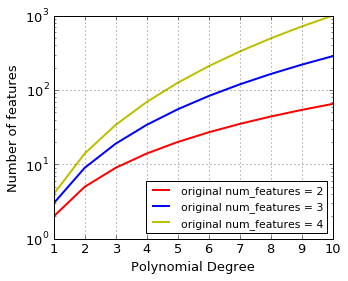

In [6]:
for file in ['y01.csv','y01_n3.csv','y01_n4.csv']: # 3 files with n = 2, 3, and 4, respectively
    numfeatures = []
    polydeg = []    
    for p in range(1,11):   
        pp4 = vnns.PreProcess(datafile='Data\\Small\\'+file,polydeg=p)
        data_array = pp4.read_datafile()
        X,y = pp4.data_array_to_xy(data_array)
        Xpoly = pp4.add_polynomial_features(X)
        numfeatures.append(Xpoly.shape[1])
        polydeg.append(p)
    plt.semilogy(polydeg,numfeatures, label = "original num_features = "+str(numfeatures[0]))
plt.legend(loc='lower right')
plt.xlabel("Polynomial Degree")
plt.ylabel("Number of features");
plt.show()

<font color=darkblue> Number of features explodes easily if original number of features and/or polynomial degree are high.

#### <font color=darkblue> PreProcess Ex5 - Partitioning dataset into traininig and validation sets

In [7]:
pp5 = vnns.PreProcess(datafile='Data\\Medium\\multiclass1_tr.csv')
data_array = pp5.read_datafile()
X,y = pp5.data_array_to_xy(data_array)
Xtr,ytr,Xval,yval = pp5.partition_training_set(X,y, seedno=0)
print("Dimensions:")
print ("X:", X.shape, "\ty:", y.shape)
print ("Xtr:", Xtr.shape, "\tytr:", ytr.shape)
print ("Xval:", Xval.shape, "\tyval:", yval.shape)
print ("training to total samples ratio:", np.round(len(Xtr)/len(X),3), "=", pp5.fts, "(fts parameter)")

Dimensions:
X: (125, 2) 	y: (125, 1)
Xtr: (88, 2) 	ytr: (88, 1)
Xval: (37, 2) 	yval: (37, 1)
training to total samples ratio: 0.704 = 0.7 (fts parameter)


<font color=darkblue> Total number of samples has been partitioned into training and validation samples with a ratio of ~7/3.

#### <font color=darkblue> PreProcess Ex6 - Combining individual functions to pre-process a datafile

In [8]:
pp6 = vnns.PreProcess(datafile='Data\\Small\\yabclong.csv', normalize=True, polydeg=2, partition=True)
print('Incoming dataset to be normalized, expanded, and partitioned(top 5 rows):')
display(pd.read_csv('Data\\Small\\yabclong.csv').head())
Xtr,ytr,Xval,yval = pp6.process_training_set()
print('\nTraining set post processing (top 5 rows):')
TR = pd.DataFrame(np.column_stack((Xtr,ytr)), columns=['Xtr1','Xtr2','Xtr3','Xtr4','Xtr5','ytr'])
TR['ytr'] = TR['ytr'].apply(np.int64)
display (TR.head())
print('\nValidation set post processing:')
VAL = pd.DataFrame(np.column_stack((Xval,yval)), columns=['Xval1','Xval2','Xval3','Xval4','Xval5','yval'])
VAL['yval'] = VAL['yval'].apply(np.int64)
display (VAL)

Incoming dataset to be normalized, expanded, and partitioned(top 5 rows):


,X1,X2,y
0,1,1,b
1,2,4,a
2,3,3,c
3,5,8,b
4,6,12,b



Training set post processing (top 5 rows):


,Xtr1,Xtr2,Xtr3,Xtr4,Xtr5,ytr
0,0.172235,1.035676,0.029665,0.178379,1.072626,1
1,-0.384216,-0.172613,0.147622,0.066320,0.029795,0
2,0.172235,2.243966,0.029665,0.386488,5.035382,1
3,-0.569699,-0.474685,0.324557,0.270428,0.225326,2
4,-0.384216,-0.474685,0.147622,0.182381,0.225326,2



Validation set post processing:


,Xval1,Xval2,Xval3,Xval4,Xval5,yval
0,-0.013249,1.035676,0.000176,-0.013721,1.072626,1
1,-0.755182,-1.078830,0.570300,0.814713,1.163873,1
2,0.357718,1.337749,0.127962,0.478537,1.789572,0
3,-0.013249,-0.172613,0.000176,0.002287,0.029795,2


<font color=darkblue> Datafile read, target labels standardized, feature columns normalized, num_features increased from 2 to 5 by polynomial expansion of degree 2, and data partitioned into training and validation sets.

#### <font color=darkblue> PreProcess Ex7 - Pre-processing test set

In [9]:
print("test set before processing:")
pp71 = vnns.PreProcess(datafile='Data\\Medium\\multiclass1_test.csv')
data_array = pp71.read_datafile()
Xtest_pre,ytest_pre = pp71.data_array_to_xy(data_array)
print("\tXtest dimensions:", Xtest_pre.shape)
print ("\tXtest mean:",np.mean(Xtest_pre,axis=0))
print ("\tXtest sigma:",np.std(Xtest_pre,axis=0))

pp72 = vnns.PreProcess(datafile='Data\\Medium\\multiclass1_tr.csv', normalize=True, polydeg=2)
Xtr,ytr,Xval,yval = pp72.process_training_set()
Xtest_post,ytest_post = pp72.process_test_set('Data\\Medium\\multiclass1_test.csv',pp72.mu_,pp72.sigma_)
print("\ntest set after processing:")
print("\tXtest dimensions:", Xtest_post.shape)
print ("\tXtest mean:",np.mean(Xtest_post,axis=0))
print ("\tXtest sigma:",np.std(Xtest_post,axis=0))

test set before processing:
	Xtest dimensions: (25, 2)
	Xtest mean: [ 4.22  1.32]
	Xtest sigma: [ 1.68689063  0.73539105]

test set after processing:
	Xtest dimensions: (25, 5)
	Xtest mean: [ 0.31489581  0.19076415  1.01985366  0.94484021  0.96473184]
	Xtest sigma: [ 0.95952816  0.96350448  0.69264699  0.72219889  0.82797498]


<font color=darkblue> Because training set was normalized and polynomial features were added, test set is also normalized (using mu & sigma from the training set) and 2nd deg polynomial features were added.

## <font color=darkblue> class DeepSolve()

#### <font color=darkblue> DeepSolve Ex1 - Activation functions

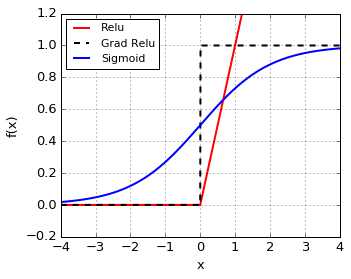

In [10]:
x = np.arange(-4,4,0.01)
ds1 = vnns.DeepSolve()
plt.plot(x,ds1.relu(x), label='Relu')
plt.plot(x,ds1.gradrelu(x),'--', label='Grad Relu', c='k')
plt.plot(x,ds1.sigmoid(x), label='Sigmoid')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.ylim(-0.2,1.2)
plt.show()

<font color=darkblue> Regarding the activations and its gradients only these three functions will be needed since we will use relu activation at each layer except at the last one that is sigmoid.

#### <font color=darkblue> DeepSolve Ex2 - Target vector conversion for multiclass

In [11]:
for file in ['y01.csv','y012.csv']:
    pp2 = vnns.PreProcess("Data\\Small\\"+file)
    data_array = pp2.read_datafile()
    X,y = pp2.data_array_to_xy(data_array)
    ds2 = vnns.DeepSolve()
    print("y: \n", y)
    print(">> convert_to_one_hot(y): \n", ds2.convert_to_one_hot(y), "\n")

y: 
 [[1]
 [0]
 [0]
 [1]
 [1]
 [0]]
>> convert_to_one_hot(y): 
 [[1]
 [0]
 [0]
 [1]
 [1]
 [0]] 

y: 
 [[1]
 [0]
 [2]
 [1]
 [1]
 [0]]
>> convert_to_one_hot(y): 
 [[0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]] 



<font color=darkblue> If number of classes > 2, target vector is converted to one-hot matrix. Otherwise the same vector is returned.

#### <font color=darkblue> DeepSolve Ex3 - Setting layer sizes

In [12]:
for file in ['yab.csv','yabc.csv']:
    for polydeg in [1,2]:            
        pp3 = vnns.PreProcess("Data\\Small\\"+file, polydeg=polydeg)
        X,y,Xval,yval = pp3.process_training_set() 
        ds3 = vnns.DeepSolve(hidden_units=[4,3])
        X1 = ds3.add_bias(X)
        layer_sizes = ds3.set_layer_sizes(X1,y)
        print("file:", file,"/ polydeg:",polydeg, "/ num_classes:",len(np.unique(y)))
        print(">> layer sizes:", layer_sizes, "\n")

file: yab.csv / polydeg: 1 / num_classes: 2
>> layer sizes: [2, 4, 3, 1] 

file: yab.csv / polydeg: 2 / num_classes: 2
>> layer sizes: [5, 4, 3, 1] 

file: yabc.csv / polydeg: 1 / num_classes: 3
>> layer sizes: [2, 4, 3, 3] 

file: yabc.csv / polydeg: 2 / num_classes: 3
>> layer sizes: [5, 4, 3, 3] 



<font color=darkblue> Number of input units is determined by the number of features which depends on the polynomial degree. Number of output units is determined by the number of classes. Hidden layer configuration ([4,3] in this example) is defined by the user.

#### <font color=darkblue> DeepSolve Ex4 - Initializing parameters

In [13]:
pp4 = vnns.PreProcess("Data\\Small\\yab.csv", polydeg=2)
X,y,Xval,yval = pp4.process_training_set() 
ds4 = vnns.DeepSolve(initialize='deep',hidden_units=[4,3,2])
X1 = ds4.add_bias(X)
layer_sizes = ds4.set_layer_sizes(X1,y)
print("layer sizes:", layer_sizes)
theta_init = ds4.initialize_parameters(layer_sizes)
for i in range (1, len(layer_sizes)):
    print(">> theta"+str(i)+" dim:", theta_init[i].shape)
print("\ntheta_init[1]:\n",theta_init[1])

layer sizes: [5, 4, 3, 2, 1]
>> theta1 dim: (4, 6)
>> theta2 dim: (3, 5)
>> theta3 dim: (2, 4)
>> theta4 dim: (1, 3)

theta_init[1]:
 [[ 0.          0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [ 0.         -0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [ 0.         -0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [ 0.         -0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]


<font color=darkblue> Dimensions of theta connecting a layer of A units to a layer of B units is (B, A+1).

#### <font color=darkblue> DeepSolve Ex5 - Forward propagation

In [14]:
pp5 = vnns.PreProcess('Data\\Small\\yab.csv')
X,y,Xval,yval = pp5.process_training_set()

ds5 = vnns.DeepSolve(initialize='deep', hidden_units=[2])
X1 = ds5.add_bias(X)

layer_sizes = ds5.set_layer_sizes(X1,y)
print("layer sizes:",layer_sizes)
print("num units:", layer_sizes[0],"= n (input),",layer_sizes[1],"= h (hidden),", layer_sizes[2],"= o (output)")
print("num_samples:", X.shape[0])
theta_init = ds5.initialize_parameters(layer_sizes)
Z,AL,A1 = ds5.fwd_prop(theta_init,X1)
print("\nX:", X.shape,"-- feature matrix (m,n)") 
print("A[1]:", X.T.shape, "-- transpose of X (n,m)")
print("A1[1]:",A1[1].shape, "-- add bias (row vector of ones) (n+1,m)")
print ("\ttheta[1]:",theta_init[1].shape, "-- network parameters (h,n+1)")
print ("Z[2]:",Z[2].shape, "-- np.dot(theta[1],A1[1]) (h,m)")
print("A[2]:",Z[2].shape, "-- relu(Z[2]) (h,m)")
print("A1[2]:",A1[2].shape,"-- add bias (row vector of ones) to A[2] (h+1,m)")
print ("\ttheta[2]:",theta_init[2].shape, "-- network parameters (o,h+1)")
print ("Z[3]:",Z[3].shape,"-- np.dot(theta[2],A1[2]) (o,m)")
print("A[3]:",AL.shape,"-- sigmoid(Z[3]) (= AL) (o,m)")

layer sizes: [2, 2, 1]
num units: 2 = n (input), 2 = h (hidden), 1 = o (output)
num_samples: 6

X: (6, 2) -- feature matrix (m,n)
A[1]: (2, 6) -- transpose of X (n,m)
A1[1]: (3, 6) -- add bias (row vector of ones) (n+1,m)
	theta[1]: (2, 3) -- network parameters (h,n+1)
Z[2]: (2, 6) -- np.dot(theta[1],A1[1]) (h,m)
A[2]: (2, 6) -- relu(Z[2]) (h,m)
A1[2]: (3, 6) -- add bias (row vector of ones) to A[2] (h+1,m)
	theta[2]: (1, 3) -- network parameters (o,h+1)
Z[3]: (1, 6) -- np.dot(theta[2],A1[2]) (o,m)
A[3]: (1, 6) -- sigmoid(Z[3]) (= AL) (o,m)


<font color=darkblue> Step by step forward propagation for a 3-layer network with [2, 2, 1] units.

#### <font color=darkblue> DeepSolve Ex6 - Back propagation

In [15]:
pp6 = vnns.PreProcess('Data\\Small\\yab.csv')
X,y,Xval,yval = pp6.process_training_set()
ds6 = vnns.DeepSolve(initialize='deep', hidden_units=[2])
X1 = ds6.add_bias(X)
layer_sizes = ds6.set_layer_sizes(X1,y)
print("layer sizes:",layer_sizes)
print("num units:", layer_sizes[0],"= n (input),",layer_sizes[1],"= h (hidden),", layer_sizes[2],"= o (output)")
print("num_samples:", X.shape[0])
theta_init = ds6.initialize_parameters(layer_sizes)
Z,AL,A1 = ds6.fwd_prop(theta_init,X1)
dZ = ds6.back_prop(theta_init,y,AL,Z)
print("\ny:", y.shape,"-- target vector (m,o)") 
print("y.T:", y.T.shape,"-- transpose (o,m)") 
print("\tA[3]:",AL.shape,"-- output activation from forward-prop (o,m)")
print("dZ[3]:", dZ[3].shape, "-- AL - y (o,m)")
print ("\ttheta[2]:",theta_init[2].shape, "-- network parameters from forward-prop(o,h+1)")
theta_r_2 = theta_init[2][:,1:] 
print ("\ttheta_r_2:",theta_r_2.shape,"-- strip bias column (o,h)")
theta_r_T_2 = theta_r_2.T 
print ("\ttheta_r_T_2:",theta_r_T_2.shape, "-- transpose (h,o)")
dA_2 = np.dot(theta_r_T_2, dZ[3])
print("dA_2:",np.dot(theta_r_T_2, dZ[3]).shape, "-- np.dot(theta_r_T_2, dZ[3]) (h,m)")
print ("\tZ[2]:",Z[2].shape, "-- pre-activation from forward-prop (h,m)")
grz_2 = ds6.gradrelu(Z[2])
print("\tgrz_2:",grz_2.shape, "-- self.gradrelu(Z[2])(h,m)") 
print("dZ[2]:",(dA_2*grz_2).shape, "-- dA_2*grZ_2 (h,m)")

layer sizes: [2, 2, 1]
num units: 2 = n (input), 2 = h (hidden), 1 = o (output)
num_samples: 6

y: (6, 1) -- target vector (m,o)
y.T: (1, 6) -- transpose (o,m)
	A[3]: (1, 6) -- output activation from forward-prop (o,m)
dZ[3]: (1, 6) -- AL - y (o,m)
	theta[2]: (1, 3) -- network parameters from forward-prop(o,h+1)
	theta_r_2: (1, 2) -- strip bias column (o,h)
	theta_r_T_2: (2, 1) -- transpose (h,o)
dA_2: (2, 6) -- np.dot(theta_r_T_2, dZ[3]) (h,m)
	Z[2]: (2, 6) -- pre-activation from forward-prop (h,m)
	grz_2: (2, 6) -- self.gradrelu(Z[2])(h,m)
dZ[2]: (2, 6) -- dA_2*grZ_2 (h,m)


<font color=darkblue> Step by step back propagation for a three-layer network with [2, 2, 1] units. Forward & back propagation, as well as the parameter updates were illustrated below for a generic three-layer network.
<br><img src="Images/Forw&BackProp.png", width=1000>

#### <font color=darkblue> DeepSolve Ex7 - Cost & Gradients

In [16]:
pp7 = vnns.PreProcess('Data\\Small\\yab.csv')
X,y,Xval,yval = pp7.process_training_set()
ds7 = vnns.DeepSolve(initialize='deep', lamda=1, hidden_units=[2])
X1 = ds7.add_bias(X)
layer_sizes = ds7.set_layer_sizes(X1,y)
print("layer sizes:",layer_sizes)
print("num units:", layer_sizes[0],"= n (input),",layer_sizes[1],"= h (hidden),", layer_sizes[2],"= o (output)")
theta_init = ds7.initialize_parameters(layer_sizes)
J_init = ds7.cost_nn(theta_init,X1,y)
Grad = ds7.grad_nn(theta_init,X1,y)
print("Initial cost:", J_init)
print("Grad[2]:",Grad[2].shape, "-- (o,h+1)")
print("Grad[1]:",Grad[1].shape, "-- (h,n+1)")

layer sizes: [2, 2, 1]
num units: 2 = n (input), 2 = h (hidden), 1 = o (output)
Initial cost: 0.787985027802
Grad[2]: (1, 3) -- (o,h+1)
Grad[1]: (2, 3) -- (h,n+1)


<font color=darkblue> Initial cost calculation and gradient shapes for a 3-layer network with [2, 2, 1] units.

#### <font color=darkblue> DeepSolve Ex8 - Finding parameters theta by gradient descent


layer sizes: [400, 10]
>>  Converged
number of iterations: 1263
learning rate: 0.8999999999999999
dim theta[1]: (10, 401)

layer sizes: [400, 20, 10]
>>  Converged
number of iterations: 9003
learning rate: 0.08099999999999999
dim theta[1]: (20, 401)
dim theta[2]: (10, 21)


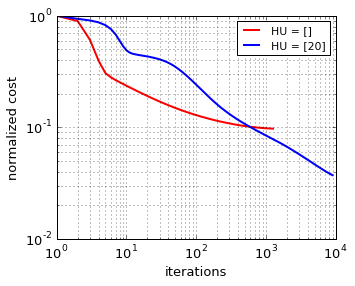

In [17]:
pp8 = vnns.PreProcess('Data\\Big\\handwrite_tr.csv')
HU = [[],[20]]
i = 1
X,y,Xval,yval = pp8.process_training_set()
for hidden_units in HU:
    ds8 = vnns.DeepSolve(method='GD', initialize='deep', learning_rate='auto', lamda=1, maxiter= 10000,  
                         hidden_units=hidden_units)    
    theta = ds8.fit_gdnn(X,y)
    print("\nlayer sizes:", ds8.set_layer_sizes(ds8.add_bias(X),y))
    print(">> ",ds8.message_)
    print("number of iterations:", ds8.niter_)
    print ("learning rate:", ds8.lrfinal_)
    for i in range (1,len(theta.keys())+1):
        print("dim theta["+str(i)+"]:", theta[i].shape)
    plt.loglog(np.arange(1,ds8.niter_+2,1),ds8.Jh_/ds8.Jh_[0],label= "HU = "+str(hidden_units))
    plt.xlabel("iterations")
    plt.ylabel("normalized cost")
    plt.grid(True,which='both')
    plt.legend()
    i += 1
plt.show();

<font color=darkblue> Network paramaeters (theta) were computed using gradient descent for two networks: one with no hidden layers and the other with single hidden layer featuring 20 units (num_features = 400, num_classes = 10.)

##### DeepSolve Ex9 - Rolling and unrolling a dictionary

In [18]:
pp9 = vnns.PreProcess('Data\\Medium\\multiclass1_tr.csv')
X,y,Xval,yval = pp9.process_training_set()
ds9 = vnns.DeepSolve(hidden_units=[5,4])
X1 = ds9.add_bias(X)
layer_sizes = ds9.set_layer_sizes(X1,y)
print("layer_sizes:",layer_sizes)
theta_init = ds9.initialize_parameters(layer_sizes) 
print("\n>> theta matrix dimensions after initialization:")
for i in range (1, len(layer_sizes)):
    print("theta"+str([i])+":", theta_init[i].shape)
UR = ds9.unroll(theta_init)
print("\n>> unrolled theta vector dimension:\n",UR.shape)
TMS = ds9.dict_dims(theta_init)
print("\n>> matrix holding theta dimensions:\n",TMS)
R = ds9.roll(UR,TMS)
print("\n>> theta dimensions after roll-back:")
for i in range (1, len(layer_sizes)):
    print("theta"+str([i])+":", R[i].shape)  

layer_sizes: [2, 5, 4, 3]

>> theta matrix dimensions after initialization:
theta[1]: (5, 3)
theta[2]: (4, 6)
theta[3]: (3, 5)

>> unrolled theta vector dimension:
 (54, 1)

>> matrix holding theta dimensions:
 [[5 4 3]
 [3 6 5]]

>> theta dimensions after roll-back:
theta[1]: (5, 3)
theta[2]: (4, 6)
theta[3]: (3, 5)


<font color=darkblue> Showing that from the unrolled theta vector, rolled theta dictionary can be reconstructed if original theta dimensions are known.

#### <font color=darkblue> DeepSolve Ex10 - Finding parameters theta by scipy.optimize.minimize


layer sizes: [400, 10]
>>  Converged (|f_n-f_(n-1)| ~= 0)
number of iterations: 8
dim theta[1]: (10, 401)

layer sizes: [400, 20, 10]
>>  Converged (|f_n-f_(n-1)| ~= 0)
number of iterations: 30
dim theta[1]: (20, 401)
dim theta[2]: (10, 21)


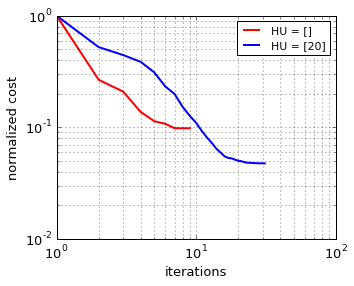

In [19]:
pp10 = vnns.PreProcess('Data\\Big\\handwrite_tr.csv')
HU = [[],[20]]
i = 1
X,y,Xval,yval = pp10.process_training_set()
for hidden_units in HU:
    ds10 = vnns.DeepSolve(method='TNC', initialize='deep', lamda=1, maxiter= 10000, hidden_units=hidden_units)  
    theta = ds10.fit_scipynn(X,y)
    print("\nlayer sizes:", ds10.set_layer_sizes(ds10.add_bias(X),y))
    print(">> ",ds10.message_)
    print("number of iterations:", ds10.niter_)
    for i in range (1,len(theta.keys())+1):
        print("dim theta["+str(i)+"]:", theta[i].shape)
    plt.loglog(np.arange(1,ds10.niter_+2,1),ds10.Jh_/ds10.Jh_[0],label= "HU = "+str(hidden_units))
    plt.xlabel("iterations")
    plt.ylabel("normalized cost")
    plt.grid(True,which='both')
    plt.legend()
    i += 1
plt.show();   

<font color=darkblue> Theta computed using scipy.optimize.minimize 'TNC' method for two networks: one with no hidden layers
and the other with single hidden layer featuring 20 units (num_features = 400, num_classes = 10.) Note the significantly smaller number of iterations needed by 'TNC' compared to 'GD' (see DeepSolve Ex11) in order to reduce the cost to similar levels.

#### <font color=darkblue> DeepSolve Ex11 - Finding parameters theta using generalized method fit_nn

In [20]:
pp11 = vnns.PreProcess('Data\\Big\\handwrite_tr.csv')
methods = ['GD','TNC']
X,y,Xval,yval = pp11.process_training_set()
for method in methods:
    ds11 = vnns.DeepSolve(method=method, learning_rate = 'auto', initialize='deep', lamda=1, maxiter= 1000, 
                          hidden_units=[20])    
    theta = ds11.fit_nn(X,y)
    print("method:",method)
    print("layer sizes:", ds11.set_layer_sizes(ds11.add_bias(X),y))
    print(">> ",ds11.message_)
    print("normalized cost :", ds11.Jh_[-1]/ds11.Jh_[0],)
    print("number of iterations:", ds11.niter_)
    print("exec time:", ds11.timetofit_, "sec")

method: GD
layer sizes: [400, 20, 10]
>>  Max number of iterations reached
normalized cost : 0.0845827302352
number of iterations: 1000
exec time: 24.768368 sec
method: TNC
layer sizes: [400, 20, 10]
>>  Converged (|f_n-f_(n-1)| ~= 0)
normalized cost : 0.047588686901
number of iterations: 30
exec time: 13.107715 sec


<font color=darkblue> fit_nn method allows to call custom-implemented gradient descent algorithm and scipy's built-in algorithms in a similar fashion, by using method parameter of class DeepSolve(). It also records the execution time.

#### <font color=darkblue> DeepSolve Ex12 - Predicting results and their accuracy

In [21]:
def predict_authentic(original_labels,y_hat):    
    orig =[]
    for i in range(len(y_hat)):
        orig.append(original_labels[y_hat[i]])
    return orig

Files = ['yab.csv', 'yabc.csv']
for datafile in Files:
    pp12 = vnns.PreProcess("Data\\Small\\"+str(datafile),normalize=True)
    X,y,Xval,yval = pp12.process_training_set()
    numclasses = len(np.unique(y))
    ds12 = vnns.DeepSolve(method='GD', hidden_units=[7])
    theta = ds12.fit_nn(X,y)
    y_hat = ds12.predict(theta,X)
    accuracy = ds12.score(y_hat,y)
    print ("file:",datafile+", number of classes:", numclasses)
    print("predicted results on the training set :", y_hat)
    print("> in terms of original labels:", predict_authentic(pp12.original_labels_,y_hat))   
    print("prediction accuracy on the training set:", accuracy)

file: yab.csv, number of classes: 2
predicted results on the training set : [1 0 1 1 1 0]
> in terms of original labels: ['b', 'a', 'b', 'b', 'b', 'a']
prediction accuracy on the training set: 1.0
file: yabc.csv, number of classes: 3
predicted results on the training set : [1 0 2 1 1 0]
> in terms of original labels: ['b', 'a', 'c', 'b', 'b', 'a']
prediction accuracy on the training set: 1.0


<font color=darkblue> predict and score methods of class DeepSolve() accommodate any number of classes. Predicted values can be converted into original labels using the original labels attribute.

#### <font color=darkblue> DeepSolve Ex13 - Training and test scores

In [22]:
pp13 = vnns.PreProcess("Data\\Big\\handwrite_tr.csv",normalize=False)
X,y,Xval,yval = pp13.process_training_set()
numclasses = len(np.unique(y))
ds13 = vnns.DeepSolve(method='GD', maxiter=10000, lamda=1, hidden_units=[20])
theta = ds13.fit_nn(X,y)
y_hat = ds13.predict(theta,X)
accuracy = ds13.score(y_hat,y)   
print("prediction accuracy on the training set:", accuracy)    
X_test,y_test = pp13.process_test_set("Data\\Big\\handwrite_test.csv")
y_hat_test = ds13.predict(theta,X_test)
accuracy_test = ds13.score(y_hat_test,y_test)  
print("prediction accuracy on the test set:", accuracy_test, "\n")

prediction accuracy on the training set: 0.98875
prediction accuracy on the test set: 0.9318637274549099 



<font color=darkblue> Training and test scores were found out using the theta calculated on the training set. Test set, stored in a separate file, is not involved in theta calculation.

## <font color=darkblue> class DeepCombine()

#### <font color=darkblue> DeepCombine Ex1 - Plotting the input data

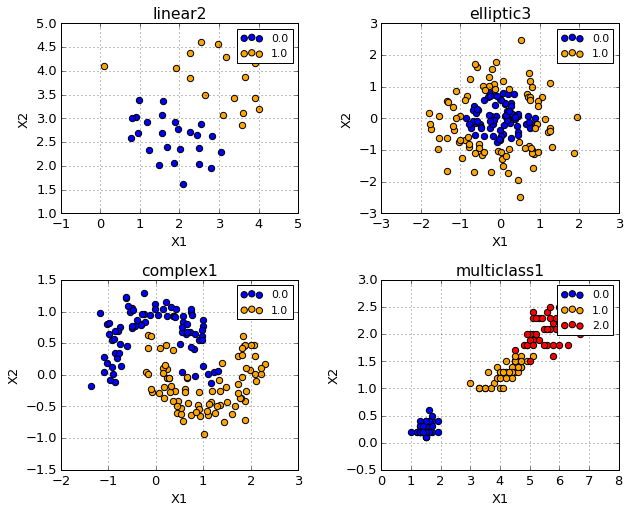

In [23]:
files = ['linear2_tr.csv', 'elliptic3_tr.csv','complex1_tr.csv' ,'multiclass1_tr.csv']
plt.figure(figsize = (10,8))
for i in range (len(files)):
    dc1 = vnns.DeepCombine('Data\\Medium\\'+files[i])
    X,y,Xval,yval = dc1.pp.process_training_set()   
    plt.subplot(2,2,i+1)
    dc1.plt_input(X,y)
    plt.title(files[i].split('_')[0])
    plt.subplots_adjust(hspace=0.35, wspace=0.35)
plt.show()   

<font color=darkblue> Examples of simple training datasets.

#### <font color=darkblue> DeepCombine Ex2 - Plotting the cost

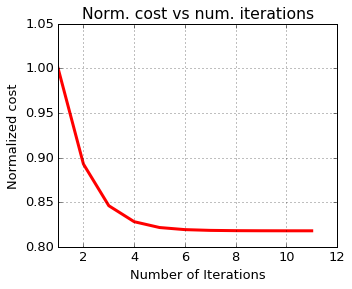

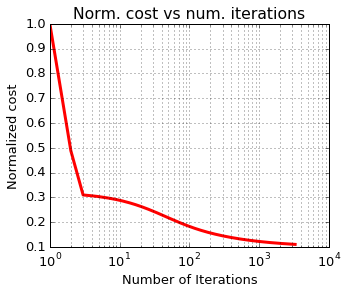

In [24]:
files = ['elliptic3_tr.csv', 'multiclass1_tr.csv']
for i in range (len(files)):
    dc2 = vnns.DeepCombine('Data\\Medium\\'+files[i],method = 'GD')
    X,y,Xval,yval = dc2.pp.process_training_set() 
    theta = dc2.ds.fit_nn(X,y)    
    plt.title(files[i].split('_')[0])
    dc2.plot_J()   

<font color=darkblue> Scales were automatically adjusted as linear or log depending on the number of iterations.

#### <font color=darkblue> DeepCombine Ex3 - Plotting the decision boundary

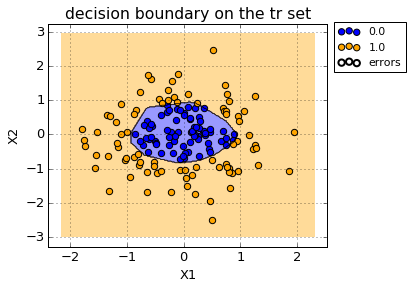

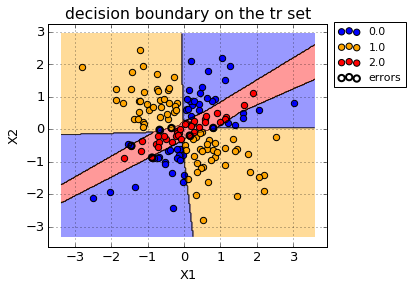

In [25]:
files = ['elliptic3_tr.csv', 'multiclass2_tr.csv']
for i in range (len(files)):
    dc3 = vnns.DeepCombine('Data\\Medium\\'+files[i],method = 'GD',maxiter=1000, hidden_units=[10])
    X,y,Xval,yval = dc3.pp.process_training_set() 
    theta = dc3.ds.fit_nn(X,y)  
    pred_tr  = dc3.ds.predict(theta,X)  
    dc3.plt_output(X,y,theta,pred_tr)  

<font color=darkblue> Decision boundary examples for two and three classes.

#### <font color=darkblue> DeepCombine Ex4 - Report generation

In [26]:
dc4 = vnns.DeepCombine('Data\\Medium\\multiclass1_tr.csv',normalize=True, polydeg=2, partition=True, method='GD', lamda=1,
                       hidden_units=[5])
X,y,Xval,yval = dc4.pp.process_training_set() 
theta = dc4.ds.fit_nn(X,y)     
pred_tr  = dc4.ds.predict(theta,X)
score_tr = dc4.ds.score(pred_tr,y)       
pred_val = dc4.ds.predict(theta,Xval)
score_val = dc4.ds.score(pred_val,yval)
Xval1 = dc4.ds.add_bias(Xval)
cost_val = dc4.ds.cost_nn(theta, Xval1, yval)
dc4.report(X,y,yval,score_tr, score_val,cost_val)  


data:
	file: Data\Medium\multiclass1_tr.csv
	m = 88 training examples
	n = 5 features
	original classes: [0.0, 1.0, 2.0]
	number of samples in class 0 = 36
	number of samples in class 1 = 25
	number of samples in class 2 = 27
solver:
	feature normalization: yes
	polynomial regression: yes (deg =  2)
	neural network config: [5, 5, 3]
	regularization: yes (lambda = 1)
	method: GD
	learning rate = 0.9
output:
	* Converged
	initial cost = 0.804964217559
	final cost = 0.181823912787
	number of iterations = 312
	accuracy on the training set: 0.966
	execution time:  0.183423  sec
validation:
	number of samples in class 0 = 8
	number of samples in class 1 = 16
	number of samples in class 2 = 13
	cost = 0.334399472961
	accuracy on the validation set: 1.0


<font color=darkblue> All relevant information in one place.

#### <font color=darkblue> DeepCombine Ex5 - Combining input, output, cost plots and reporting capability

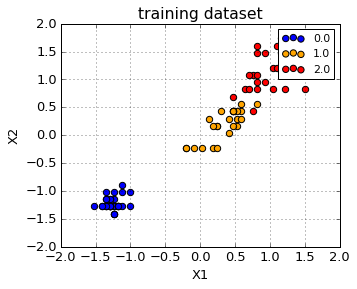

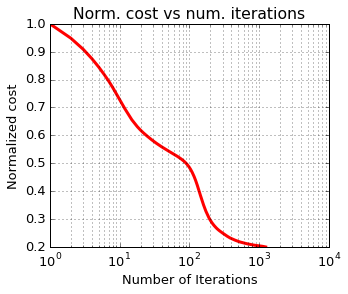


data:
	file: Data\Medium\multiclass1_tr.csv
	m = 88 training examples
	n = 5 features
	original classes: [0.0, 1.0, 2.0]
	number of samples in class 0 = 36
	number of samples in class 1 = 25
	number of samples in class 2 = 27
solver:
	feature normalization: yes
	polynomial regression: yes (deg =  2)
	neural network config: [5, 4, 4, 3]
	regularization: yes (lambda = 1)
	method: GD
	learning rate = 0.27
output:
	* Converged
	initial cost = 0.876315400072
	final cost = 0.175317525663
	number of iterations = 1242
	accuracy on the training set: 0.966
	execution time:  0.764224  sec
validation:
	number of samples in class 0 = 8
	number of samples in class 1 = 16
	number of samples in class 2 = 13
	cost = 0.325306098371
	accuracy on the validation set: 1.0


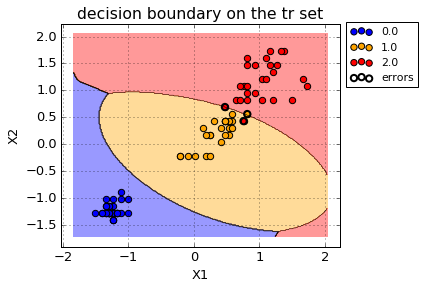

In [42]:
dc5 = vnns.DeepCombine('Data\\Medium\\multiclass1_tr.csv',normalize=True, polydeg=2,partition=True,  method='GD',
                       lamda=1, hidden_units=[4,4])
results = dc5.combine(seedno=0, plot_input=True, plot_J=True, plot_output=True, report_summary=True)

<font color=darkblue> Input, cost, decision boundary were plotted and summary is reported.

## <font color=darkblue> class DeepLearnAuto()

#### <font color=darkblue> DeepLearnAuto Ex1 - Generating candidate polynomial degrees list

In [28]:
dla1 = vnns.DeepLearnAuto()
cand_poly = dla1.candidate_poly()
print ("For polydeg_max =", str(dla1.polydeg_max)+", list of candidate polynomial degrees:",cand_poly)

For polydeg_max = 5, list of candidate polynomial degrees: [1, 2, 3, 4, 5]


<font color=darkblue> Candidate polydeg are integers from 1 to polydeg_max which is fixed to 5.

#### <font color=darkblue> DeepLearnAuto Ex2 - Generating candidate lamdas list

In [29]:
dla2 = vnns.DeepLearnAuto()
cand_lamda = [10] + dla2.candidate_lamda().tolist() 
print("lamda_numdecade =", str(dla2.lamda_numdecade), "=> candidate lamda:", cand_lamda)

lamda_numdecade = 3 => candidate lamda: [10, 3.0, 1.0, 0.3, 0.1, 0.03, 0.01]


<font color=darkblue> The number of candidate lamdas = 2*lamda_numdecade + 1 (including laminit = 10 from method find_bestlambda.)

#### <font color=darkblue> DeepLearnAuto Ex3  - Generating candidate hidden units list

In [30]:
print("num_class = 2 & total_units_max = 10:\n")
for nhl in range (4):
    dla3a = vnns.DeepLearnAuto(datafile="Data\\Medium\\complex2_tr.csv",num_hidden_layers=nhl,total_units_max=10)
    candnn = dla3a.candidate_hidden_units()
    print("num_hidden_layers =",nhl, "=> candidate hidden_units:", candnn)

num_class = 2 & total_units_max = 10:

num_hidden_layers = 0 => candidate hidden_units: [[]]
num_hidden_layers = 1 => candidate hidden_units: [[], [3], [4], [5], [6], [7], [8], [9], [10]]
num_hidden_layers = 2 => candidate hidden_units: [[], [3, 3], [4, 4], [5, 5]]
num_hidden_layers = 3 => candidate hidden_units: [[], [3, 3, 3]]


<font color=darkblue>  For each candidate, combined number of units cannot exceed total_units_max. 

In [43]:
print("num_class = 3 & num_hidden_layers = 2:\n")
for thm in (5,10,15):
    dl3b = vnns.DeepLearnAuto(datafile="Data\\Medium\\multiclass1_tr.csv", num_hidden_layers=2, total_units_max=thm)
    cand_hu = dl3b.candidate_hidden_units()
    print("max_units_total =", thm, "=> candidate hidden_layers:", cand_hu)

num_class = 3 & num_hidden_layers = 2:

max_units_total = 5 => candidate hidden_layers: [[]]
max_units_total = 10 => candidate hidden_layers: [[], [4, 4], [5, 5]]
max_units_total = 15 => candidate hidden_layers: [[], [4, 4], [5, 5], [6, 6], [7, 7]]


<font color=darkblue> Because num_class = 3 and num_hidden_layers = 2, the candidate with the smallest number of units (other
than the empty list) is [4,4]. Empty list is always a candidate irrespective of what num_hidden_layers parameters is.

#### <font color=darkblue>DeepLearnAuto Ex4 - Scores vs candidate polydeg or hidden units

In [32]:
dla4a = vnns.DeepLearnAuto(datafile="Data\\Medium\\complex2_tr.csv", method='GD', polydeg='auto', hidden_units=[10])
cand_poly = dla4a.candidate_poly()
sorted_scores = dla4a.scores_vs_poly_or_hu(cand_poly)
display(pd.DataFrame(sorted_scores,columns = ['polydeg', 'score']))

,polydeg,score
0,1.0,0.825545
1,5.0,0.850467
2,4.0,0.853583
3,2.0,0.862928
4,3.0,0.894081


<font color=darkblue>  A higher polydeg does not necessarily mean a higher score.

In [33]:
dla4b = vnns.DeepLearnAuto(datafile="Data\\Medium\\complex2_tr.csv", polydeg=1, method='GD', maxiter=10000, hidden_units='auto', 
                           num_hidden_layers=2, total_units_max=15)
cand_hid_units = dla4b.candidate_hidden_units()
sorted_scores = dla4b.scores_vs_poly_or_hu(cand_hid_units)
display(pd.DataFrame(sorted_scores,columns = ['hidden units', 'score']))

,hidden units,score
0,[],0.563863
1,"[3, 3]",0.663551
2,"[4, 4]",0.850467
3,"[7, 7]",0.866044
4,"[5, 5]",0.878505
5,"[6, 6]",0.88785


<font color=darkblue> Similarly, a higher number of units does not necessarily mean an improved score.

#### <font color=darkblue> DeepLearnAuto Ex5 - Finding optimal poly deg or hidden layer configuration

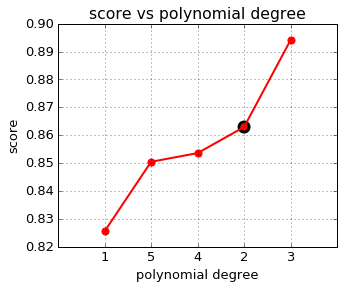

In [34]:
dla5a = vnns.DeepLearnAuto(datafile="Data\\Medium\\complex2_tr.csv",method='GD', polydeg='auto',hidden_units=[10])
cand_poly = dla5a.candidate_poly()
sorted_scores = dla5a.scores_vs_poly_or_hu(cand_poly)
optimal_polydeg = dla5a.find_best_poly_or_hu(sorted_scores)
dla5a.plot_scores_vs_poly_or_hu(sorted_scores,optimal_polydeg)

<font color=darkblue> polydeg = 2 is selected as optimal because it provides, based on our criteria, the best compromise between simplicity and accuracy.

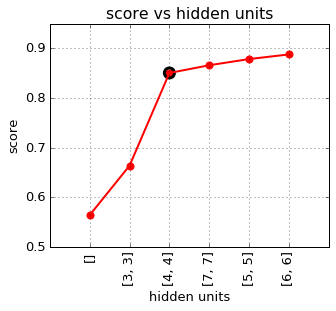

In [35]:
dla5b = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv", polydeg=1, method='GD', maxiter=10000, hidden_units='auto',
                           num_hidden_layers=2, total_units_max=15)
cand_hid_units = dla5b.candidate_hidden_units()
sorted_scores = dla5b.scores_vs_poly_or_hu(cand_hid_units)
optimal_hid_units = dla5b.find_best_poly_or_hu(sorted_scores)
dla5b.plot_scores_vs_poly_or_hu(sorted_scores,optimal_hid_units)

<font color=darkblue> hidden_units = [4,4] is optimal because, per our criteria, it provides the best compromise between simplicity and accuracy.

#### <font color=darkblue> DeepLearnAuto Ex6 - Mean training and validation scores after shuffling multiple times

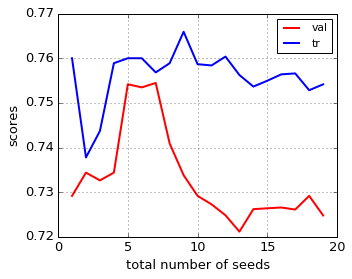

In [36]:
mean_val_score = []
mean_tr_score = []
totseed = []
for tseed in range (1,20):
    dla6 = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv",polydeg=1, method='GD', lamda=0, hidden_units=[4,4]) 
    dla6.totalseed = tseed # fixed value of parameter totalseed is set to 10 in class DeepLearnAuto() under __init__. 
                           # Here different values were assigned to totalseed in a for loop to study their impact on 
                           # validation and test scores. The impact of varying other parameters with fixed values such 
                           # as topscore and deltascore can also be studied with a similar approach (whereby one first
                           # defines the instance and then varies the particular parameter which nominally has a fixed
                           # value.)
    S = dla6.mean_scores_of_shuffled_data(dla6.polydeg,dla6.hidden_units,dla6.lamda)
    mean_val_score = np.append(mean_val_score,S[0])
    mean_tr_score = np.append(mean_tr_score,S[1])
    totseed = np.append(totseed, tseed)
plt.plot(totseed,mean_val_score, label='val')
plt.plot(totseed,mean_tr_score, label = 'tr')
plt.legend()
plt.xlabel("total number of seeds")
plt.ylabel("scores");
plt.show()

<font color=darkblue> For this particular dataset and hyperparameters used, scores tend to stabilize when total number of
seeds gets higher than ~10. Optimal lamda, set by validation and training score trends may depend on the number of shuffles. As the number of shuffles increases, there is a lesser risk of mean score trends being modulated by the randomness of data partitioning into training and validation sets.

#### <font color=darkblue> DeepLearnAuto Ex7 - Finding optimal lamda

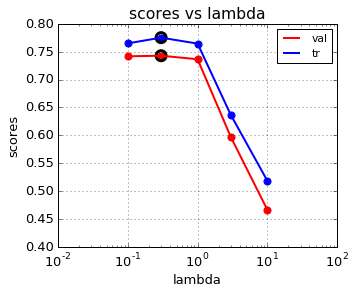

optimal lambda: 0.3


In [37]:
dla7 = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv",polydeg=1, method='GD', hidden_units=[4,4]) 
bestlamda = dla7.find_bestlambda(dla7.polydeg,dla7.hidden_units)  
dla7.plot_scores_vs_lamda()
print("optimal lambda:", bestlamda)               

<font color=darkblue> Candidate lamdas are being swept back from 10 logarithmically as long as either training score is not
"high enough" or validation score increases above a certain rate.

#### <font color=darkblue> DeepLearnAuto Ex8 - Finding optimal polydeg, hidden units, and lamda in auto mode

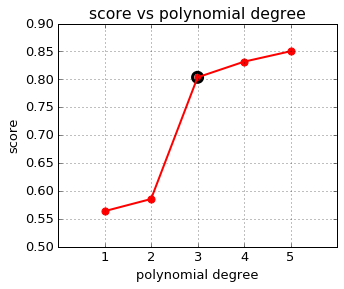

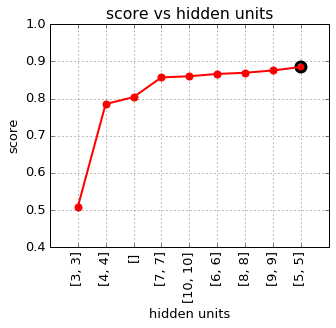

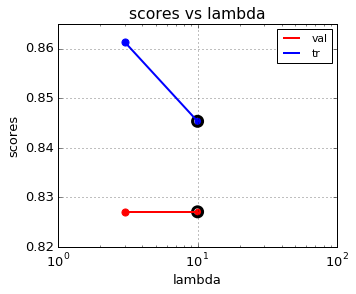

optimal poly: 3
optimal hu: [5, 5]
optimal lamda: 10.0


In [38]:
dla8 = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv",normalize=True, polydeg='auto',method='GD', lamda='auto', 
                          maxiter = 2000, hidden_units='auto', num_hidden_layers=2, total_units_max=20, plot_poly=True,
                          plot_hidden=True, plot_lam=True)                       
bestpoly,besthu,bestlamda = dla8.hyperparams()
print("optimal poly:", bestpoly)
print("optimal hu:", besthu)
print("optimal lamda:", bestlamda)

<font color=darkblue> When all in auto mode, optimal values of hyperparameters were calculated following a specific order (polydeg first, hidden_units next, and lamda last.)

#### <font color=darkblue> DeepLearnAuto Ex9 - Finding theta and training score by using the optimal hyperparameters

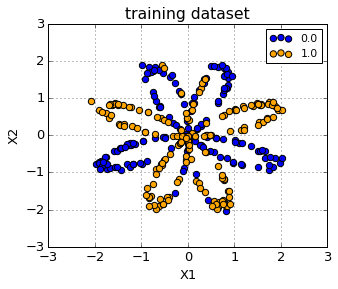

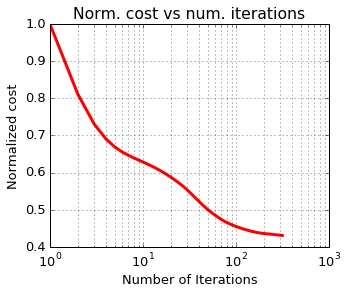


data:
	file: Data\Medium\complex2_tr.csv
	m = 321 training examples
	n = 9 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 158
	number of samples in class 1 = 163
solver:
	feature normalization: yes
	polynomial regression: yes (deg =  3)
	neural network config: [9, 5, 5, 1]
	regularization: yes (lambda = 10.0)
	method: GD
	learning rate = 0.27
output:
	* Converged
	initial cost = 0.677320909446
	final cost = 0.291972109809
	number of iterations = 315
	accuracy on the training set: 0.844
	execution time:  0.35242  sec


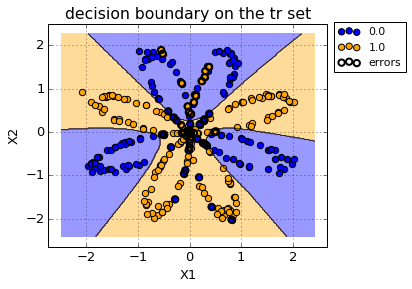

In [39]:
dla9 = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv",normalize=True, polydeg='auto',method='GD', lamda='auto', 
                          maxiter = 2000, hidden_units='auto', num_hidden_layers=2, total_units_max=20, 
                          plot_input=True,report_summary=True, plot_output=True, plot_J=True)
theta,score_tr,bestpoly, besthu, bestlambda,niter, timetofit, finalcost, mu_tr,sigma_tr = dla9.fit_auto()

<font color=darkblue> Theta and training score were calculated using hyperparameters polydeg, hidden_units, and lamda that were optimized in auto mode.

#### <font color=darkblue> DeepLearnAuto Ex10 - Test set predictions and score

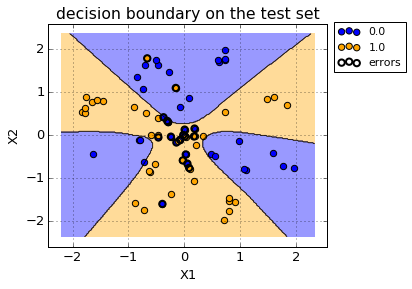

training score: 0.844
test score: 0.759


In [40]:
dla10 = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv",normalize=True, polydeg='auto',method='GD', lamda='auto', 
                          maxiter = 2000, hidden_units='auto', num_hidden_layers=2, total_units_max=20, 
                          plot_test=True)
theta,score_tr,bestpoly, besthu, bestlambda,niter,timetofit,final_cost,mu_tr,sigma_tr = dla10.fit_auto()
pred_test, score_test = dla10.pred_score_test("Data\\Medium\\complex2_test.csv",theta, bestpoly, besthu, mu_tr,sigma_tr)
print("training score:", np.round(score_tr,3))
print("test score:", score_test)

<font color=darkblue> Decision boundary computed from the training set is overlaid on an independent test set (that was stored in a separate file) to calculate the test score.

#### <font color=darkblue> DeepLearnAuto Ex11 - Generating summary table

In [41]:
dla11 = vnns.DeepLearnAuto("Data\\Medium\\complex2_tr.csv",normalize=True, polydeg='auto',method='GD', lamda='auto', 
                          maxiter = 2000, hidden_units='auto', num_hidden_layers=2, total_units_max=20)
theta,score_tr,bestpoly, besthu, bestlambda,niter,timetofit,final_cost,mu_tr,sigma_tr = dla11.fit_auto()
pred_test, score_test = dla11.pred_score_test("Data\\Medium\\complex2_test.csv",theta, bestpoly, besthu, mu_tr,sigma_tr)
summary = dla11.generate_summary()
display(summary)

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex2,True,GD,315,0.35975,3,"[5, 5]",10.0,0.844,0.759


<font color=darkblue> Most of the relevant parameters and results were captured in table format. Additional parameters such as final normalized cost could be added as additional columns without difficulty.